### Import Library

In [2]:
import pandas as pd
import numpy as np

### Read Dataset

In [3]:
path_file = 'dataset/gojek_review_sentiment.csv'

df = pd.read_csv(path_file)
df

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive
...,...,...
1777,Jelas lebih baik daripada yang lain di luar sa...,positive
1778,"Untuk ruang penyimpanan yang luas, buatlah sed...",negative
1779,"Aplikasi yang sangat bagus, beri kami lebih ba...",positive
1780,cintai ini terutama ketika Anda membutuhkan tr...,positive


In [4]:
df.rate.value_counts()

rate
negative    1061
positive     721
Name: count, dtype: int64

In [5]:
category = pd.get_dummies(df.rate).astype(int)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='rate')
df_baru.head()

,review,negative,positive
0,Apa aplikasi yang bagus untuk dengan mudah per...,0,1
1,Aplikasi ini banyak membantu saya. Sekarang sa...,0,1
2,Mengerikan. Antarmukanya sangat membingungkan....,1,0
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,0,1
4,Aplikasi ini sebenarnya bagus dan sangat memba...,0,1


In [6]:
review = df_baru['review'].values
label = df_baru[['negative','positive']].values

### Split Dataset

In [7]:
from sklearn.model_selection import train_test_split

review_latih, review_test, label_latih, label_test = train_test_split(
    review, label, random_state=42, test_size=0.2
)

### Train Model

In [8]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_latih)
tokenizer.fit_on_texts(review_test)

sequence_latih = tokenizer.texts_to_sequences(review_latih)
sequence_test = tokenizer.texts_to_sequences(review_test)

max_length = 100
padded_latih = pad_sequences(sequence_latih, maxlen=max_length)
padded_test = pad_sequences(sequence_test, maxlen=max_length)

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
num_epochs = 10

history = model.fit(padded_latih, label_latih,
                    epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2)

Epoch 1/10
45/45 - 10s - loss: 0.6302 - accuracy: 0.6814 - val_loss: 0.5360 - val_accuracy: 0.7843 - 10s/epoch - 228ms/step
Epoch 2/10
45/45 - 1s - loss: 0.3872 - accuracy: 0.8540 - val_loss: 0.3167 - val_accuracy: 0.8964 - 640ms/epoch - 14ms/step
Epoch 3/10
45/45 - 1s - loss: 0.1851 - accuracy: 0.9340 - val_loss: 0.3080 - val_accuracy: 0.8796 - 583ms/epoch - 13ms/step
Epoch 4/10
45/45 - 1s - loss: 0.1069 - accuracy: 0.9614 - val_loss: 0.3221 - val_accuracy: 0.9244 - 561ms/epoch - 12ms/step
Epoch 5/10
45/45 - 1s - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.3796 - val_accuracy: 0.8852 - 576ms/epoch - 13ms/step
Epoch 6/10
45/45 - 1s - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.4176 - val_accuracy: 0.9020 - 565ms/epoch - 13ms/step
Epoch 7/10
45/45 - 1s - loss: 0.0179 - accuracy: 0.9965 - val_loss: 0.4938 - val_accuracy: 0.9020 - 584ms/epoch - 13ms/step
Epoch 8/10
45/45 - 1s - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.5361 - val_accuracy: 0.8992 - 577ms/epoch - 13ms/step
Epoch 9/

### Test Model

In [13]:
review_latih[100]

'Tidak dapat membuka Aplikasi, mengerikan'

In [14]:
padded_latih[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   3,  10, 265,   4, 261])

In [15]:
label_latih[100]

array([1, 0])

In [17]:
def prediksi(text):
  text_sequence = tokenizer.texts_to_sequences(text)

  text_padded = pad_sequences(text_sequence, maxlen=100)
  return text_padded

In [18]:
predict = model.predict(prediksi([review_latih[100]]))
predict

1/1 [==============================] - 0s 374ms/step


array([[9.9998248e-01, 2.0021562e-05]], dtype=float32)

In [19]:
np.argmax(predict)

0

### Evaluation

In [20]:
from sklearn.metrics import confusion_matrix

# Prediksi kelas untuk data uji
y_pred = model.predict(padded_test)

# Konversi prediksi probabilitas menjadi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Konversi label validasi ke kelas
y_true = np.argmax(label_test, axis=1)


# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

12/12 [==============================] - 0s 10ms/step


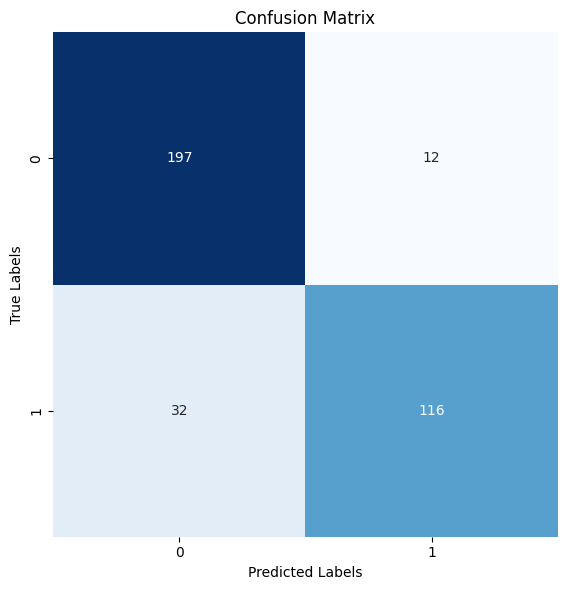

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()  # Agar layout sesuai dengan ukuran figure
plt.show()

Model masih memiliki kekuranga dalam mengklasifikasikan sentiment, dimana model harus ditingkatkan atau mencoba  menggunakan algoritma yang lain
 - 197 (True Positives, TP): Jumlah contoh dari kelas positif yang diprediksi dengan benar sebagai positif.
 - 12 (False Positives, FP): Jumlah contoh dari kelas negatif yang diprediksi salah sebagai positif.
 - 32 (False Negatives, FN): Jumlah contoh dari kelas positif yang diprediksi salah sebagai negatif.
 - 116 (True Negatives, TN): Jumlah contoh dari kelas negatif yang diprediksi dengan benar sebagai negatif.

Kesimpulan dari confusion matrix ini adalah bahwa model memiliki akurasi sekitar 87.7%, dengan presisi tinggi pada prediksi positif (94.3%) dan recall yang cukup baik (86.0%). Meskipun begitu, masih terdapat 32 instance yang seharusnya positif namun diprediksi negatif, dan 12 instance yang seharusnya negatif namun diprediksi positif.